#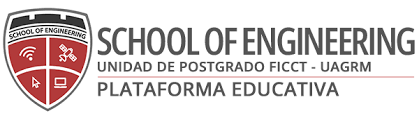

**Maestría en Ciencia de Datos e Inteligencia Artificial V1E4**
##MÓDULO 5 - Análisis Estadístico de Datos
##PCA - Análisis de componentes principales


**Universidad Autónoma Gabriel René Moreno de Santa Cruz de la Sierra-Bolivia UAGRM - POSTGRADO**<br/>
**Calidad en vinos - Analisis multivariado Aplicado a la productividad**<br/>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **Importación de Datos**

In [ ]:
df = pd.read_csv("/content/wines.csv")

In [ ]:
# Ver las columnas y las filas
df.head(20)

,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red
0,0,8.9,0.590,0.50,2.0,0.337,27.0,81.0,0.99640,3.04,1.61,9.5,6,1
1,1,7.7,0.690,0.22,1.9,0.084,18.0,94.0,0.99610,3.31,0.48,9.5,5,1
2,2,8.8,0.685,0.26,1.6,0.088,16.0,23.0,0.99694,3.32,0.47,9.4,5,1
3,3,11.4,0.460,0.50,2.7,0.122,4.0,17.0,1.00060,3.13,0.70,10.2,5,1
4,4,8.8,0.240,0.54,2.5,0.083,25.0,57.0,0.99830,3.39,0.54,9.2,5,1
5,5,6.3,0.300,0.48,1.8,0.069,18.0,61.0,0.99590,3.44,0.78,10.3,6,1
6,6,5.8,0.290,0.26,1.7,0.063,3.0,11.0,0.99150,3.39,0.54,13.5,6,1
7,7,8.8,0.600,0.29,2.2,0.098,5.0,15.0,0.99880,3.36,0.49,9.1,5,1
8,8,7.2,0.570,0.05,2.3,0.081,16.0,36.0,0.99564,3.38,0.60,10.3,6,1
9,9,8.4,0.340,0.42,2.1,0.072,23.0,36.0,0.99392,3.11,0.78,12.4,6,1


In [ ]:
## Leer los datos en la variable df
df = pd.read_csv("wines.csv",index_col="Unnamed: 0")

In [ ]:
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red
995,7.6,0.19,0.37,13.1,0.033,52.0,151.0,0.99726,3.18,0.79,10.40,6,0
996,5.5,0.62,0.33,1.7,0.037,24.0,118.0,0.98758,3.15,0.39,13.55,6,0
997,7.1,0.39,0.39,11.1,0.034,25.0,204.0,0.99616,3.05,0.52,10.00,6,0
998,7.6,0.16,0.41,1.9,0.047,27.0,151.0,0.99370,3.20,0.53,10.10,6,0
999,6.7,0.36,0.26,7.9,0.034,39.0,123.0,0.99119,2.99,0.30,12.20,7,0


In [ ]:
df.shape
len(df)

1000

In [ ]:
df.shape

(1000, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1000 non-null   float64
 1   volatile acidity      1000 non-null   float64
 2   citric acid           1000 non-null   float64
 3   residual sugar        1000 non-null   float64
 4   chlorides             1000 non-null   float64
 5   free sulfur dioxide   1000 non-null   float64
 6   total sulfur dioxide  1000 non-null   float64
 7   density               1000 non-null   float64
 8   pH                    1000 non-null   float64
 9   sulphates             1000 non-null   float64
 10  alcohol               1000 non-null   float64
 11  quality               1000 non-null   int64  
 12  red                   1000 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 109.4 KB


In [ ]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,7.558400,0.397455,0.30676,4.489250,0.067218,25.29650,91.03100,0.995351,3.251980,0.572990,10.489433,5.796000,0.50000
std,1.559455,0.189923,0.16783,4.112419,0.046931,17.06237,59.57269,0.002850,0.164416,0.169583,1.151195,0.844451,0.50025
min,3.800000,0.080000,0.00000,0.800000,0.009000,1.00000,6.00000,0.987400,2.740000,0.280000,8.500000,3.000000,0.00000
25%,6.500000,0.260000,0.22000,1.800000,0.042000,12.00000,37.75000,0.993480,3.140000,0.460000,9.500000,5.000000,0.00000
50%,7.200000,0.340000,0.30000,2.400000,0.060000,22.00000,86.00000,0.995690,3.240000,0.550000,10.300000,6.000000,0.50000
75%,8.200000,0.520000,0.40000,6.100000,0.080000,35.00000,135.00000,0.997400,3.360000,0.650000,11.300000,6.000000,1.00000
max,15.500000,1.580000,1.00000,26.050000,0.611000,131.00000,313.00000,1.003690,3.900000,2.000000,14.000000,8.000000,1.00000


## **Diversidad de datos**

# ¿Cuál es la cantidad total de valores únicos en cada columna?

In [ ]:
df.nunique() # cantidad de diferentes elementos que hay en cada columna

,0
fixed acidity,84
volatile acidity,127
citric acid,78
residual sugar,173
chlorides,145
free sulfur dioxide,85
total sulfur dioxide,219
density,434
pH,87
sulphates,86


¿Cuál es la mediana de la columna "residual sugar"?

In [ ]:
df["residual sugar"].median()

2.4

¿Cuál es el valor máximo de la columna "free sulfur dioxide"?

In [ ]:
df["free sulfur dioxide"].max()

131.0

¿Cuántos vinos rojos y blancos hay en el dataframe?

In [ ]:
df["red"].value_counts()

,count
red,
1,500
0,500


¿Cómo se distribuye la variable "quality" en términos de frecuencia?

In [ ]:
df["quality"].value_counts()

,count
quality,
6,432
5,345
7,166
4,31
8,23
3,3


In [ ]:
df["quality"].value_counts().sort_index()

,count
quality,
3,3
4,31
5,345
6,432
7,166
8,23


¿Cuál es la relación entre la variable "alcohol" y la variable objetivo "quality"?

/tmp/ipython-input-1323761231.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="quality",y="alcohol", data = df,palette="deep")


Text(0, 0.5, 'nivel de Alcohol')

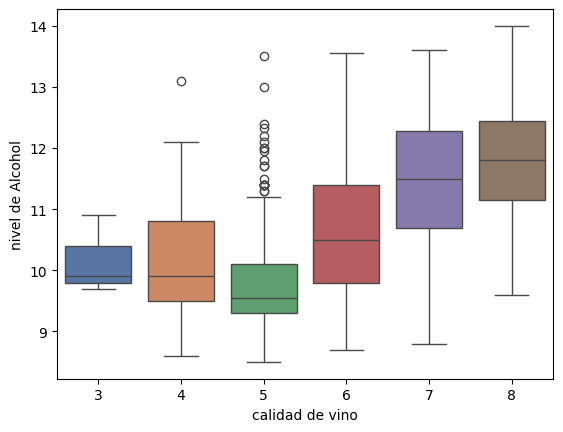

In [ ]:
### mediante boxplot
# utilizando la libreria sns
sns.boxplot(x="quality",y="alcohol", data = df,palette="deep")
# añadir etiquetas (utilizar matplotlib)
plt.xlabel("calidad de vino")
plt.ylabel("nivel de Alcohol")

¿Hay alguna correlación entre las variables "fixed acidity" y "pH"?

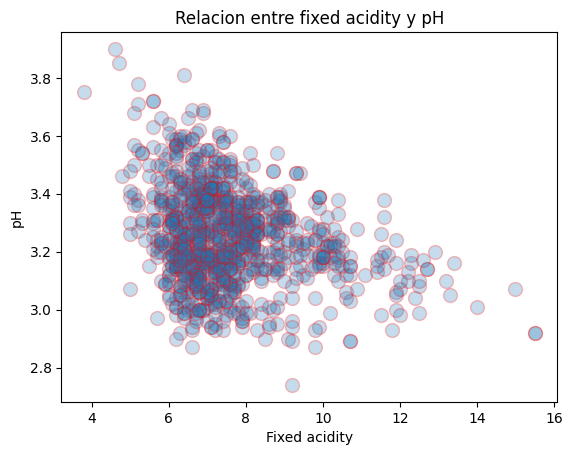

In [ ]:
# ###
# vamos a utilizar una grafica tipo scatter:
# definir el tipo de grafico (matplotlib:plt):
plt.scatter(df["fixed acidity"],df["pH"],s=100,alpha = 0.25, edgecolors="red")
# añadir etiquetas a los ejes
plt.xlabel("Fixed acidity")
plt.ylabel("pH")
# añadir el titulo a la grafica
plt.title("Relacion entre fixed acidity y pH")
plt.savefig("grafica1.svg")

¿Cuál es el promedio de "fixed acidity" para cada calidad de vino?

/tmp/ipython-input-3157037652.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="quality",y="fixed acidity", data = df,palette="deep")


Text(0, 0.5, 'nivel de fixed acidity')

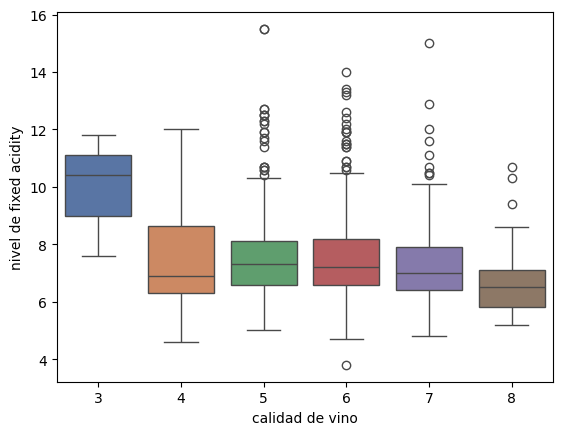

In [ ]:
### mediante boxplot
# utilizando la libreria sns
sns.boxplot(x="quality",y="fixed acidity", data = df,palette="deep")
# añadir etiquetas (utilizar matplotlib)
plt.xlabel("calidad de vino")
plt.ylabel("nivel de fixed acidity")

Text(0, 0.5, 'nivel de fixed acidity')

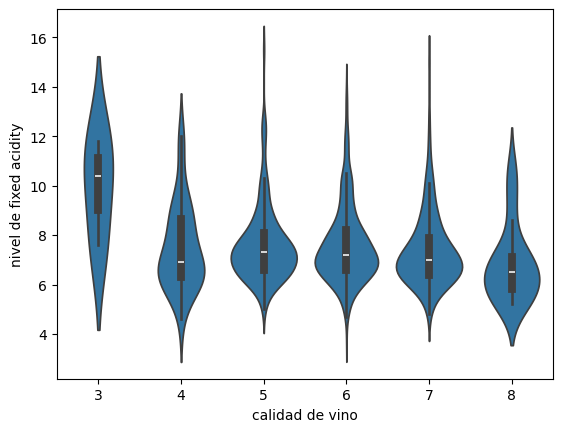

In [ ]:
### box plot y violin plot
# utilizar el violin plot de sns
sns.violinplot(x = "quality", y= "fixed acidity", data = df)
# añadir etiquetas (utilizar matplotlib)
plt.xlabel("calidad de vino")
plt.ylabel("nivel de fixed acidity")

¿Cuál es la media de "alcohol" para cada calidad de vino rojo?

In [ ]:
# Crear un gráfico de caja utilizando sns.boxplot
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red
0,8.9,0.590,0.50,2.0,0.337,27.0,81.0,0.99640,3.04,1.61,9.5,6,1
1,7.7,0.690,0.22,1.9,0.084,18.0,94.0,0.99610,3.31,0.48,9.5,5,1
2,8.8,0.685,0.26,1.6,0.088,16.0,23.0,0.99694,3.32,0.47,9.4,5,1
3,11.4,0.460,0.50,2.7,0.122,4.0,17.0,1.00060,3.13,0.70,10.2,5,1
4,8.8,0.240,0.54,2.5,0.083,25.0,57.0,0.99830,3.39,0.54,9.2,5,1


/tmp/ipython-input-561397884.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = "quality", y= "alcohol",data= df_vinos_rojos,palette= "deep")


Text(0.5, 1.0, 'Relacion entre nivel de alcohol y calidad de vinos rojos')

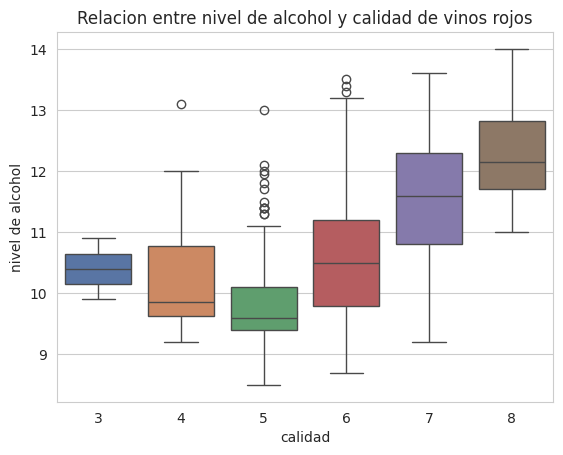

In [ ]:
# Crear un gráfico de caja utilizando sns.boxplot
filtro = df["red"]==1
df_vinos_rojos = df[filtro]
# utilizamos sns
# para formatear el tipo de grafico
sns.set_style("whitegrid")
sns.boxplot(x = "quality", y= "alcohol",data= df_vinos_rojos,palette= "deep")
# añadir etiquetas:
plt.xlabel("calidad")
plt.ylabel("nivel de alcohol")
# Añadir titulo:
plt.title("Relacion entre nivel de alcohol y calidad de vinos rojos")

In [ ]:
## en un hist plot
filtro2   = df["quality"]>=7
vinos_q7p = df[filtro2]
vinos_q7p.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red
21,10.5,0.42,0.66,2.95,0.116,12.0,29.0,0.99700,3.24,0.75,11.70,7,1
22,9.3,0.37,0.44,1.60,0.038,21.0,42.0,0.99526,3.24,0.81,10.80,7,1
23,7.2,0.36,0.46,2.10,0.074,24.0,44.0,0.99534,3.40,0.85,11.00,7,1
36,7.0,0.56,0.17,1.70,0.065,15.0,24.0,0.99514,3.44,0.68,10.55,7,1
47,10.7,0.35,0.53,2.60,0.070,5.0,16.0,0.99720,3.15,0.65,11.00,8,1
48,8.9,0.38,0.40,2.20,0.068,12.0,28.0,0.99486,3.27,0.75,12.60,7,1
52,8.0,0.59,0.16,1.80,0.065,3.0,16.0,0.99620,3.42,0.92,10.50,7,1
56,9.8,0.66,0.39,3.20,0.083,21.0,59.0,0.99890,3.37,0.71,11.50,7,1
64,7.9,0.30,0.68,8.30,0.050,37.5,289.0,0.99316,3.01,0.51,12.30,7,1
65,8.2,0.28,0.40,2.40,0.052,4.0,10.0,0.99356,3.33,0.70,12.80,7,1


Text(0.5, 1.0, 'histograma de citric acid para vinos con calidad >=7')

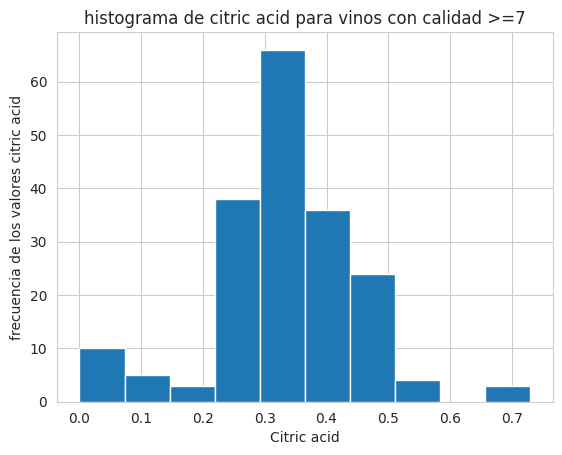

In [ ]:
## en un hist plot
filtro2   = df["quality"]>=7
vinos_q7p = df[filtro2]
vinos_q7p.head(10)
# histograma de plt
plt.hist(vinos_q7p["citric acid"])
# etiquetas:
plt.xlabel("Citric acid")
plt.ylabel("frecuencia de los valores citric acid")
plt.title("histograma de citric acid para vinos con calidad >=7")

**Cruces con algunas otras variables**

 1. Evolución del promedio de calidad según niveles de alcohol

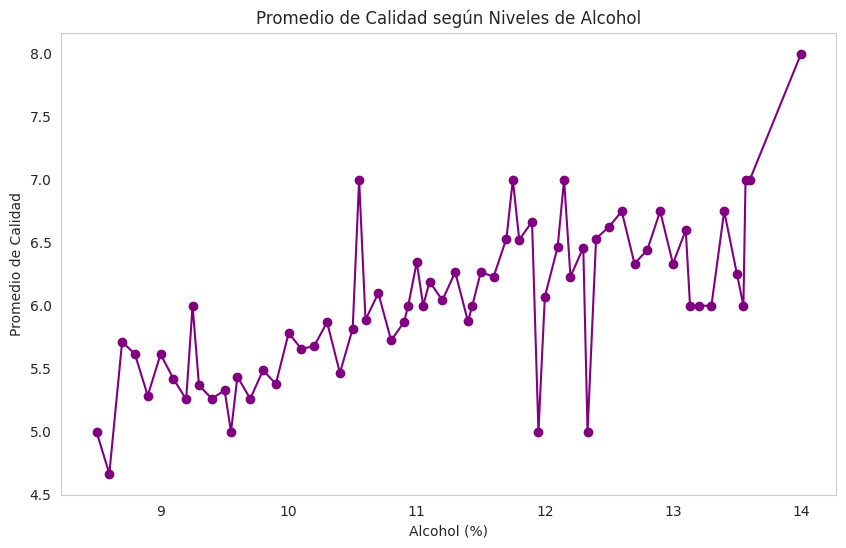

In [ ]:
alcohol_quality = df.groupby('alcohol')['quality'].mean()
plt.figure(figsize=(10, 6))
plt.plot(alcohol_quality.index, alcohol_quality.values, marker='o', color='purple')
plt.title('Promedio de Calidad según Niveles de Alcohol')
plt.xlabel('Alcohol (%)')
plt.ylabel('Promedio de Calidad')
plt.grid()
plt.show()

2. Importancia relativa de cada atributo en correlación con la calidad

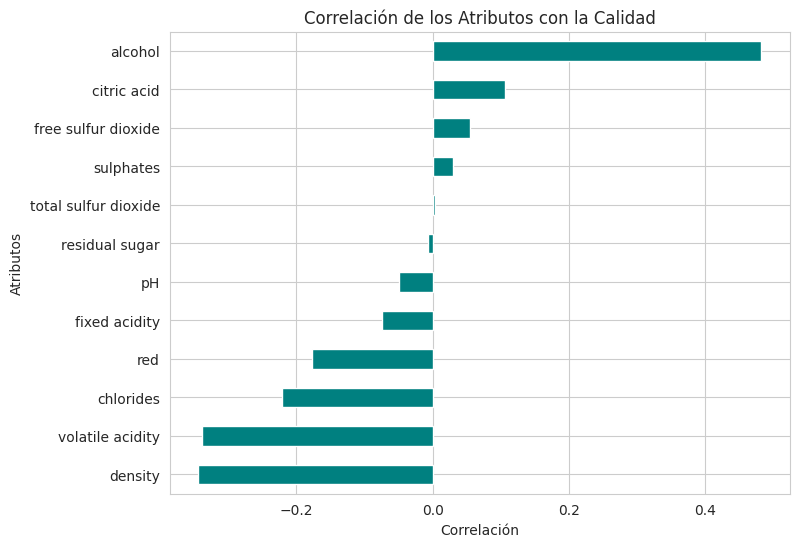

In [ ]:
correlations = df.corr()['quality'].drop('quality').sort_values()
plt.figure(figsize=(8, 6))
correlations.plot(kind='barh', color='teal')
plt.title('Correlación de los Atributos con la Calidad')
plt.xlabel('Correlación')
plt.ylabel('Atributos')
plt.show()

comentarios interpretacion:

3. volatile acidity vs density dividido por tipo de vino

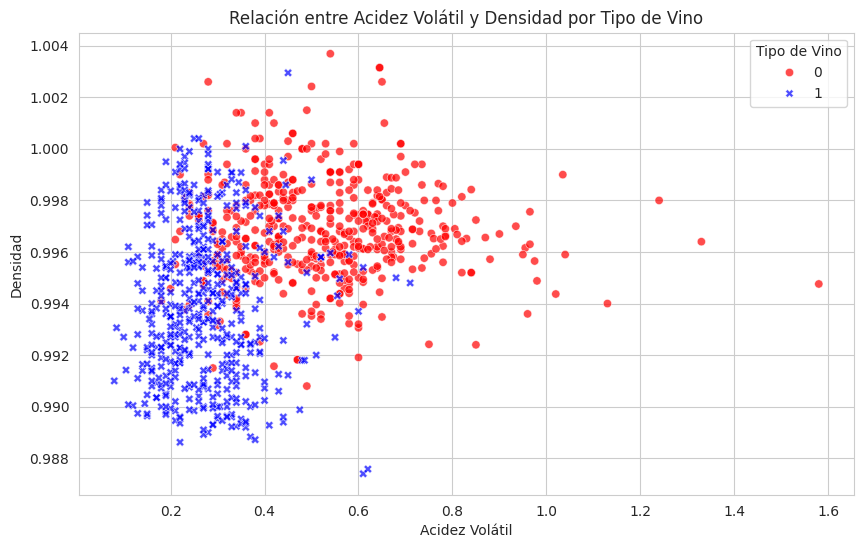

In [ ]:
df['type'] = df['red'].apply(lambda x: 0 if x == 1 else 1)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='volatile acidity', y='density', hue='type', style='type', alpha=0.7, palette=['red', 'blue'])
plt.title('Relación entre Acidez Volátil y Densidad por Tipo de Vino')
plt.xlabel('Acidez Volátil')
plt.ylabel('Densidad')
plt.legend(title='Tipo de Vino')
plt.show()

In [ ]:
edkbvkuebkcaek

4. residual sugar en vinos de baja y alta calidad

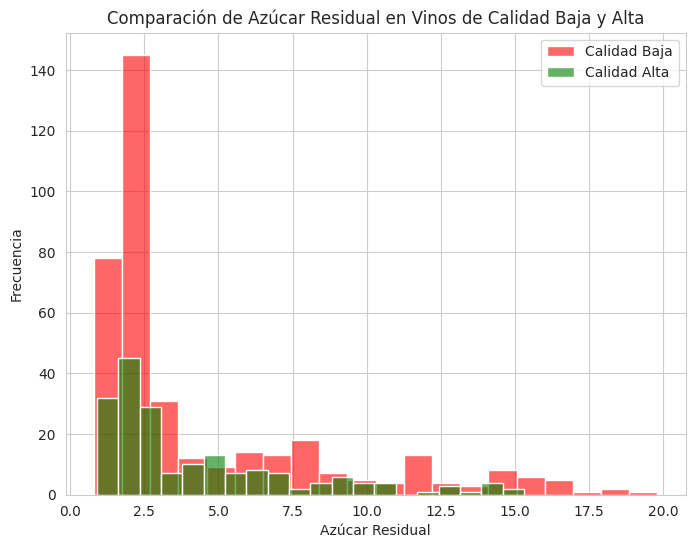

In [ ]:
low_quality = df[df['quality'] <= 5]['residual sugar']
high_quality = df[df['quality'] >= 7]['residual sugar']

plt.figure(figsize=(8, 6))
sns.histplot(low_quality, color='red', alpha=0.6, bins=20, label='Calidad Baja')
sns.histplot(high_quality, color='green', alpha=0.6, bins=20, label='Calidad Alta')
plt.title('Comparación de Azúcar Residual en Vinos de Calidad Baja y Alta')
plt.xlabel('Azúcar Residual')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()


5. Distribución acumulativa de total sulfur dioxide por calidad

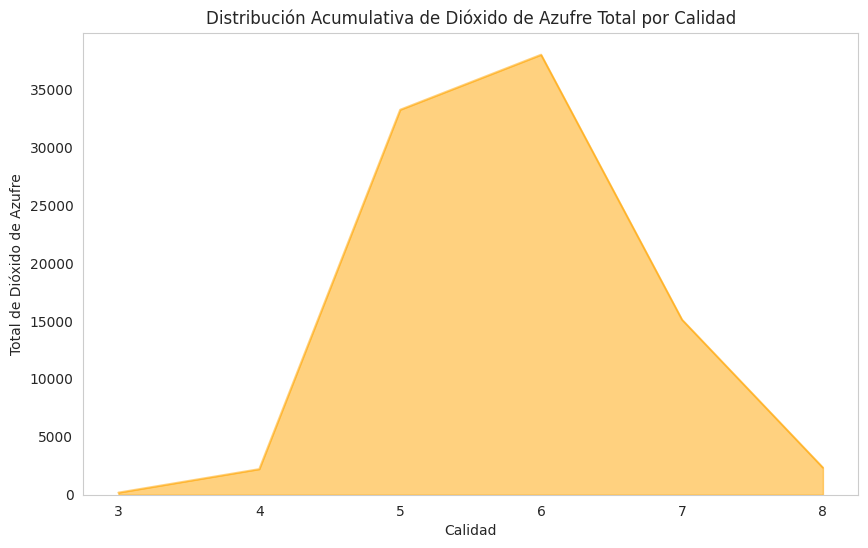

In [ ]:
sulfur_quality = df.groupby(['quality'])['total sulfur dioxide'].sum().sort_index()

plt.figure(figsize=(10, 6))
sulfur_quality.plot(kind='area', alpha=0.5, color='orange')
plt.title('Distribución Acumulativa de Dióxido de Azufre Total por Calidad')
plt.xlabel('Calidad')
plt.ylabel('Total de Dióxido de Azufre')
plt.grid()
plt.show()
